# Prediction of IBM stocks using Time series analysis

# Name:Shivani Deshmukh

In [6]:
#imporing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [7]:
df=pd.read_csv("C:\\Users\\Rahul\\Downloads\\symboisis\\dataset\\IBM_stocks.csv",index_col='Date', parse_dates=['Date'])
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM
...,...,...,...,...,...,...
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM


In [8]:
#summary statistics
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [9]:
# checking  for null values
df.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [10]:
df.shape

(3020, 6)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

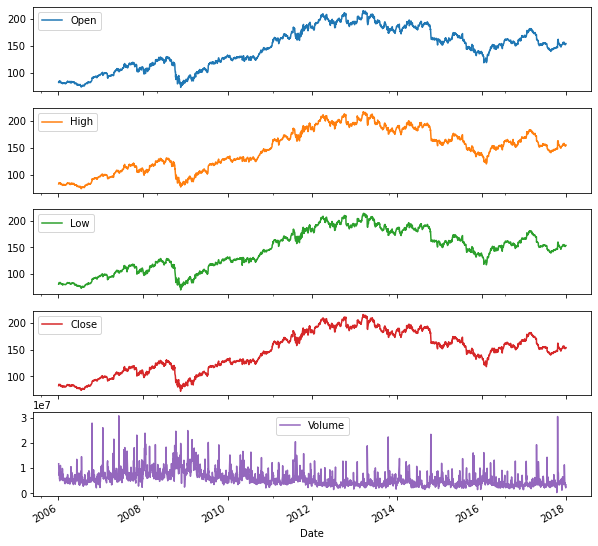

In [11]:
df.plot(subplots=True,figsize=(10,10))

<AxesSubplot:xlabel='Date'>

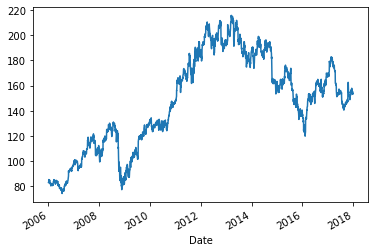

In [12]:
df['High'].plot()

# seasonality

<BarContainer object of 144 artists>

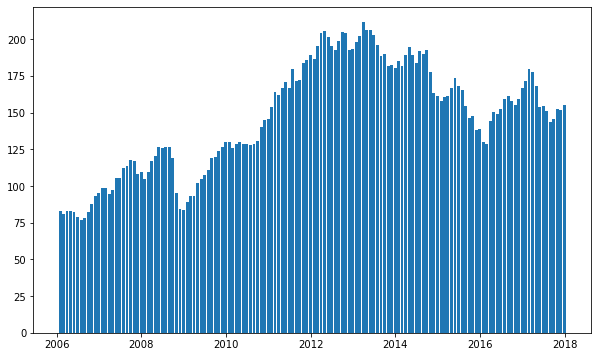

In [13]:
df_month = df.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_month['2006':].index, df_month.loc['2006':, "High"], width=25, align='center')

<AxesSubplot:xlabel='Date'>

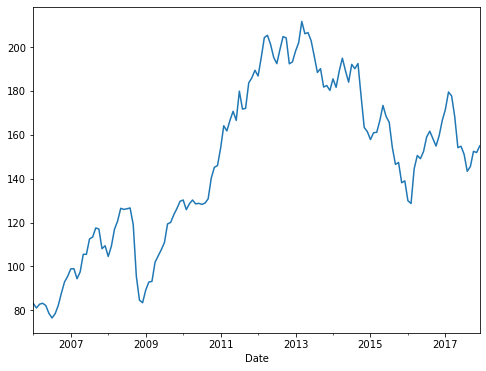

In [14]:
df_month['High'].plot(figsize=(8, 6))

In [15]:
week = df.resample("W").mean()                                                     #resampling weekwise
week

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-08,82.5000,83.245,81.6375,82.8650,9241675.00
2006-01-15,83.6880,84.118,83.1600,83.7420,6036780.00
2006-01-22,83.4950,83.825,82.5825,82.9775,8723250.00
2006-01-29,81.2040,81.822,80.7340,80.9820,6494200.00
2006-02-05,80.9220,81.682,80.5300,81.2140,6712900.00
...,...,...,...,...,...
2017-12-03,153.0540,153.692,152.2960,153.3460,4903007.00
2017-12-10,154.9820,155.848,154.1300,154.8580,4086959.40
2017-12-17,155.4020,155.876,153.8700,154.5120,6400686.40


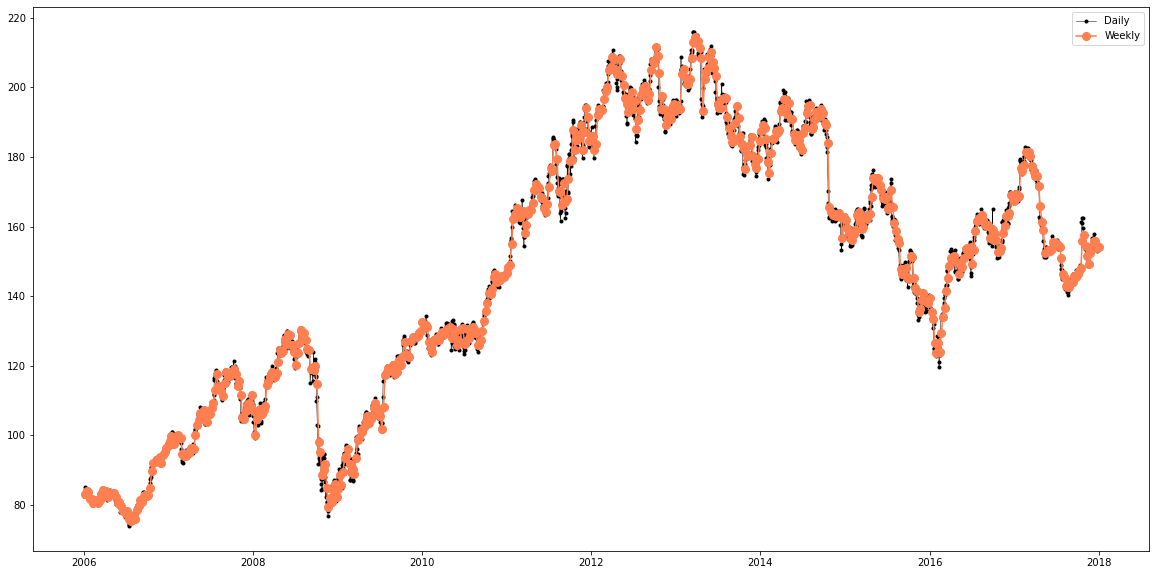

In [16]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2006-01':'2018-01', 'High'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
plt.plot(week.loc['2006-01':'2018-01', 'High'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.legend()

In [17]:
roll_10=df.rolling(7, center=True).mean()            #rolling

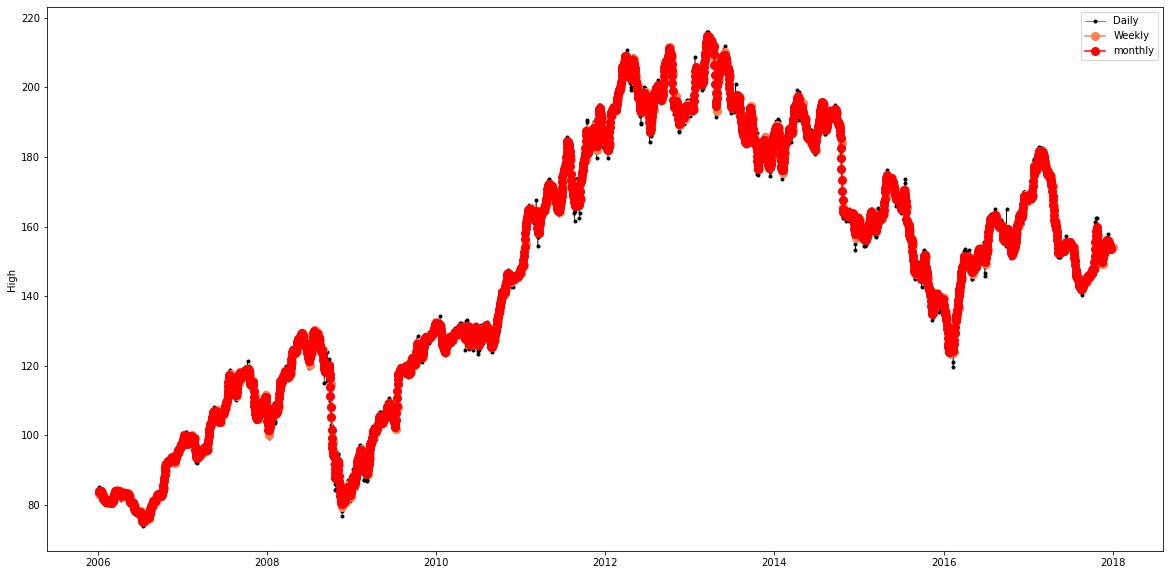

In [18]:
fig=plt.figure(figsize=(20,10))
plt.plot(df.loc['2006-01':'2018-01', 'High'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
plt.plot(week.loc['2006-01':'2018-01', 'High'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral')
plt.plot(roll_10.loc['2006-01':'2018-01', 'High'], marker='o', markersize=8, linestyle='-', label='monthly', color='red')
plt.ylabel("High")
plt.legend()

# Decomposition

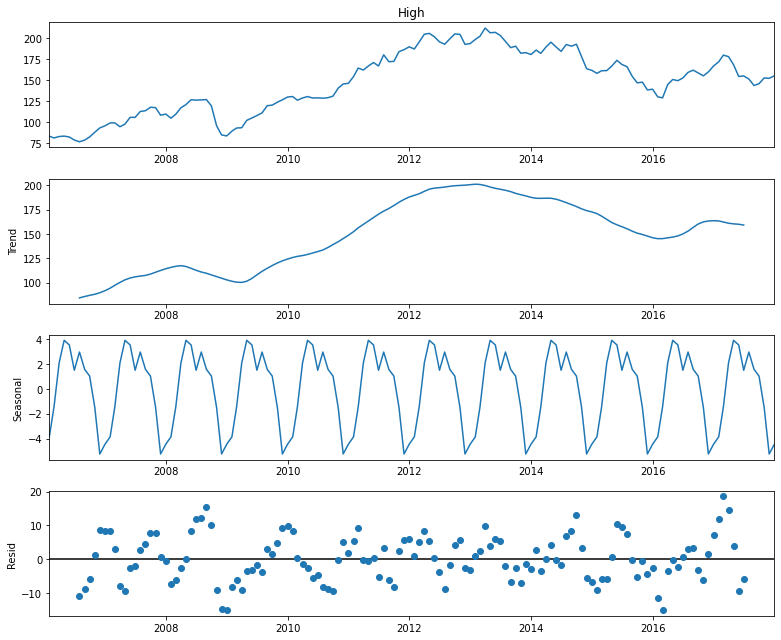

In [19]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(df_month['High'], model='Additive')
fig = decomposition.plot()

# Checking stationary with Augmendted Dickey Fuller Statistical Test

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
 
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["High"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.862553
p-value: 0.349877
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
    Here we failed to reject null hypothesis.so time series is non stationary.

# converting time series into stationary time series

# -log


# -Substracting simple rolling Avg


# -Substracting exponential rolling Avg

# -Substracting previous value(most popular) with shift()

# -Seasonal decomposition

# -combination of above

In [21]:
df_diff1=df["High"].diff()
df_diff2=df["High"].diff().diff()

In [22]:
result= adfuller(df_diff1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
pval=result[1]
if pval<0.05:
    print("stationary")
else:
    print("not stationary")

ADF Statistic: -49.818150
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567
stationary


<AxesSubplot:xlabel='Date'>

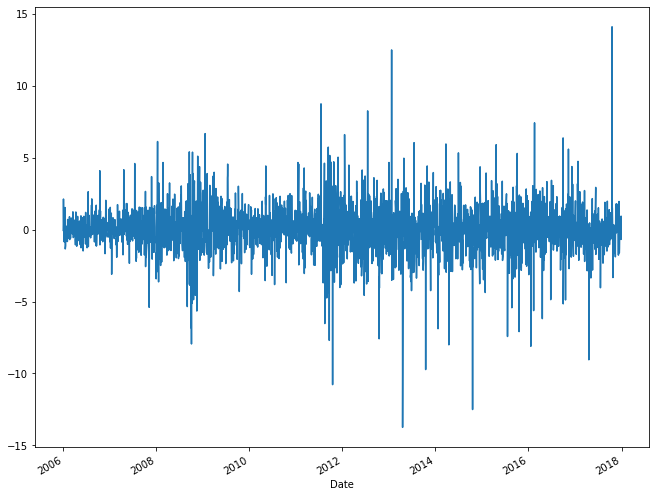

In [23]:
df_diff1.plot()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

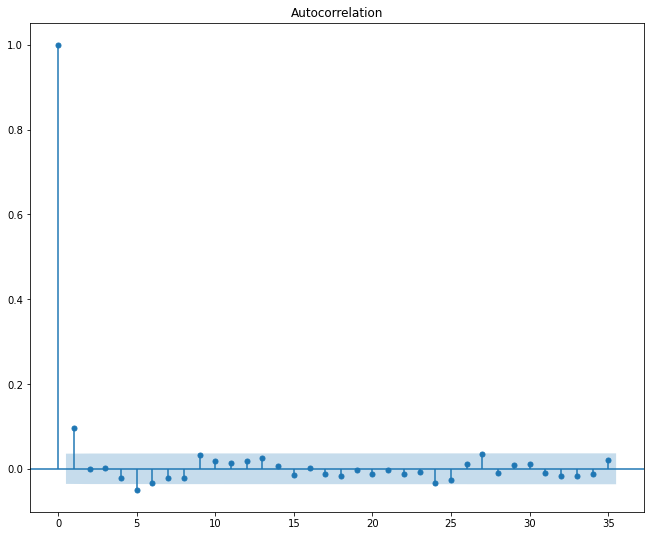

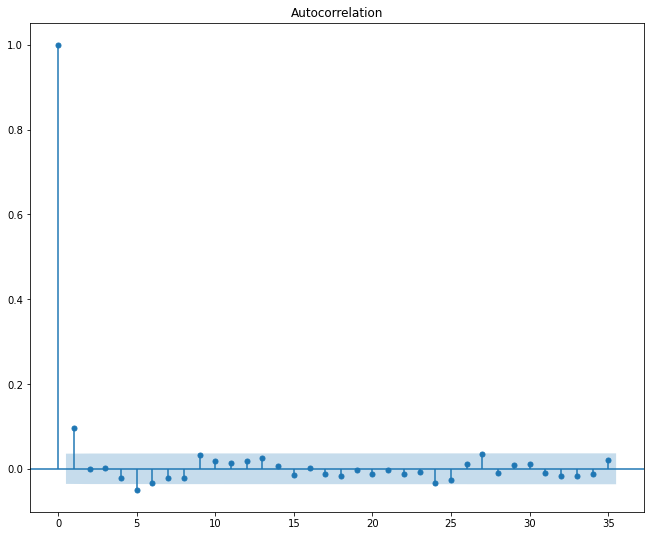

In [25]:
plot_acf(df_diff1.dropna())

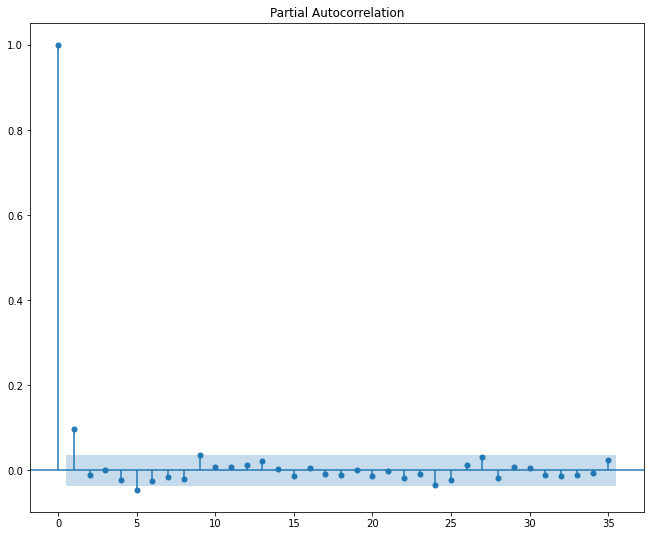

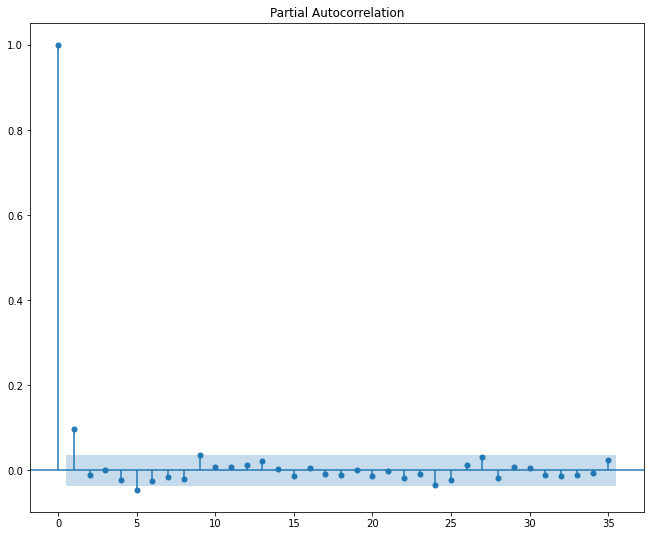

In [26]:
plot_pacf(df_diff1.dropna())

In [27]:
pip install pmdarima

In [28]:
from pmdarima import auto_arima
auto_model=auto_arima(df["High"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11522.301, Time=3.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11543.275, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11516.664, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11516.328, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11541.919, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11518.321, Time=1.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11518.321, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11520.323, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11514.868, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11516.864, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11516.863, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11515.196, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11518.864, Time=0.36 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 10.603 seconds


In [29]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df["High"],order=(0,1,1))
model_fit=model.fit(disp=0)
print(model_fit.summary())

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 3019
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -5755.164
Method:                       css-mle   S.D. of innovations              1.628
Date:                Thu, 13 May 2021   AIC                          11516.328
Time:                        23:02:42   BIC                          11534.366
Sample:                             1   HQIC                         11522.814
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0239      0.033      0.735      0.462      -0.040       0.088
ma.L1.D.High     0.0983      0.018      5.417      0.000       0.063       0.134
                                    Roots   

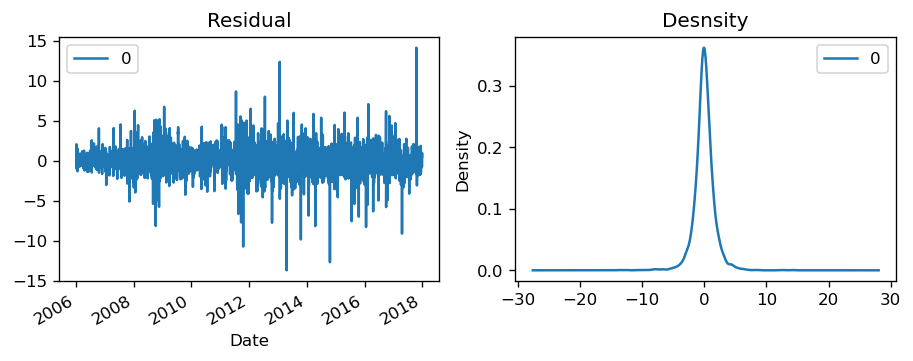

In [24]:
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
residuals=pd.DataFrame(model_fit.resid)
fig,ax=plt.subplots(1,2)
residuals.plot(title="Residual",ax=ax[0])
residuals.plot(kind="kde",title='Desnsity',ax=ax[1])
plt.show()

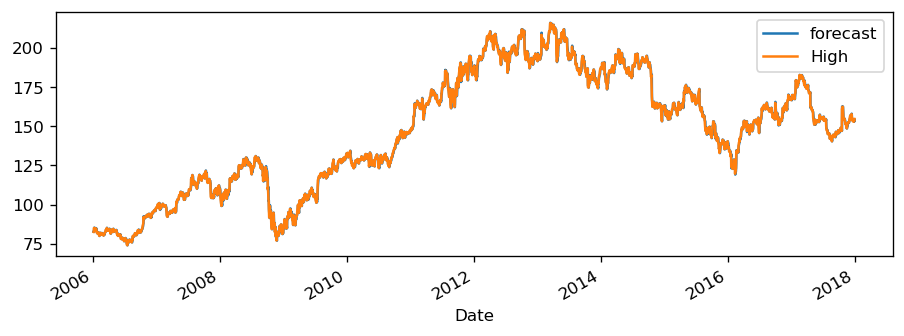

In [25]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [31]:
x=df["High"]

In [32]:
len(x)

3020

In [33]:
train_len=int(0.8*len(x))

In [34]:
train=x[:train_len]
len(train)

2416

In [35]:
test=x[train_len:]
len(test)

604

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train,order=(0,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 2415
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -4596.166
Method:                       css-mle   S.D. of innovations              1.623
Date:                Thu, 13 May 2021   AIC                           9198.332
Time:                        23:06:25   BIC                           9215.701
Sample:                             1   HQIC                          9204.649
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0305      0.037      0.831      0.406      -0.041       0.102
ma.L1.D.High     0.1100      0.020      5.435      0.000       0.070       0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -9.0940           +0.0000j            9.0940            0.5000
-----------------------------------------------------------------------------
"""

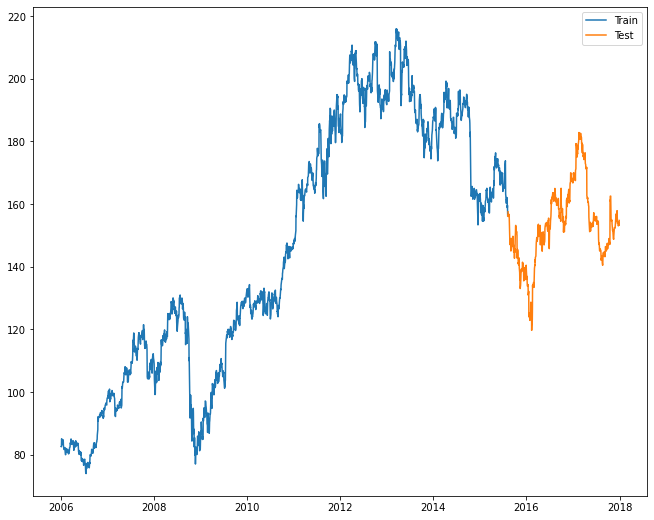

In [37]:
plt.plot(train,label="Train")
plt.plot(test,label="Test")
plt.legend()

In [33]:
ypred_train=model_fit.predict()
ypred_train

Date
2006-01-03    132.891505
2006-01-04     82.588071
2006-01-05     82.536811
2006-01-06     82.986232
2006-01-09     85.300162
                 ...    
2015-08-03    162.111705
2015-08-04    161.794369
2015-08-05    158.467116
2015-08-06    159.634115
2015-08-07    157.285659
Length: 2416, dtype: float64

In [34]:
ypred_test=model_fit.predict(start=len(train),end=len(train)+len(test))
ypred_test

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2416    156.113923
2417    156.092524
2418    156.071145
2419    156.049785
2420    156.028445
           ...    
3016    146.247665
3017    146.235358
3018    146.223062
3019    146.210777
3020    146.198503
Length: 605, dtype: float64

<AxesSubplot:ylabel='Density'>

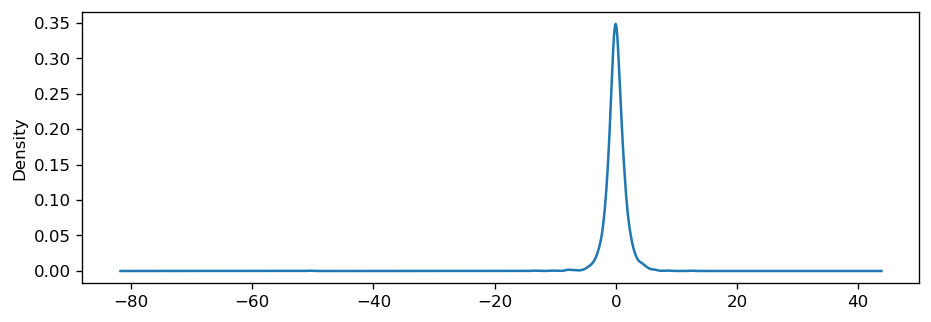

In [35]:
residuals=model_fit.resid
residuals.plot(kind="kde")

In [38]:
model=ARIMA(x,order=(0,1,1))
model_fit=model.fit() .

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [37]:
x

Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, Length: 3020, dtype: float64

In [38]:
forecast=model_fit.predict(start=len(x),end=len(x)+29)

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [39]:
forecast

3020    154.751479
3021    154.731797
3022    154.712134
3023    154.692492
3024    154.672871
3025    154.653269
3026    154.633688
3027    154.614127
3028    154.594586
3029    154.575066
3030    154.555565
3031    154.536085
3032    154.516625
3033    154.497185
3034    154.477765
3035    154.458365
3036    154.438985
3037    154.419625
3038    154.400286
3039    154.380966
3040    154.361666
3041    154.342386
3042    154.323126
3043    154.303886
3044    154.284666
3045    154.265465
3046    154.246285
3047    154.227124
3048    154.207983
3049    154.188862
dtype: float64

<AxesSubplot:>

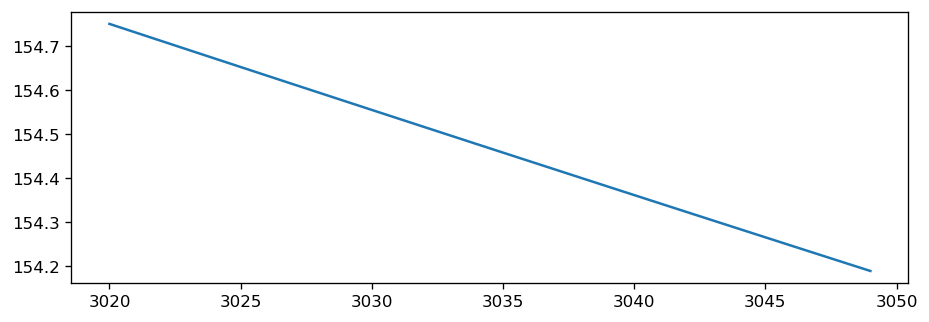

In [40]:
forecast.plot()

from the graph,we can see that value decreases over a time